In [1]:
import pandas as pd

df=pd.read_excel('Borrow_Amount.xlsx')
df.dtypes

States            object
Code              object
Latitude         float64
Longitude        float64
Borrow_Amount      int64
Buckets           object
dtype: object

In [2]:
df.head()

,States,Code,Latitude,Longitude,Borrow_Amount,Buckets
0,Alabama,AK,32.806671,-86.791130,282817,Less than Zero
1,Alaska,AL,61.370716,-152.404419,3614454,0-10
2,Arizona,AR,33.729759,-111.431221,1181690,0-10
3,Arkansas,AZ,34.969704,-92.373123,4494733,0-10
4,California,CA,36.116203,-119.681564,43350770,40-50


In [3]:
top_borrowers=df.sort_values('Borrow_Amount',ascending=False)

In [4]:
top_borrowers=top_borrowers.reset_index(drop=True)
top_borrowers.head()

,States,Code,Latitude,Longitude,Borrow_Amount,Buckets
0,New York,NY,42.165726,-74.948051,52737484,More than 50
1,California,CA,36.116203,-119.681564,43350770,40-50
2,Texas,TX,31.054487,-97.563461,37001819,30-40
3,Illinois,IL,40.349457,-88.986137,27487023,20-30
4,New Jersey,NJ,40.298904,-74.521011,20624686,10-20


In [5]:
df['Borrow_Amount'] = df['Borrow_Amount'].map('${:,.2f}'.format)
top_borrowers['Borrow_Amount'] = top_borrowers['Borrow_Amount'].map('${:,.2f}'.format)

df.head()

,States,Code,Latitude,Longitude,Borrow_Amount,Buckets
0,Alabama,AK,32.806671,-86.791130,"$282,817.00",Less than Zero
1,Alaska,AL,61.370716,-152.404419,"$3,614,454.00",0-10
2,Arizona,AR,33.729759,-111.431221,"$1,181,690.00",0-10
3,Arkansas,AZ,34.969704,-92.373123,"$4,494,733.00",0-10
4,California,CA,36.116203,-119.681564,"$43,350,770.00",40-50


In [6]:
buckets=top_borrowers.groupby('Buckets').count()
buckets

,States,Code,Latitude,Longitude,Borrow_Amount
Buckets,,,,,
0-10,26,26,26,26,26
10-20,8,8,8,8,8
20-30,1,1,1,1,1
30-40,1,1,1,1,1
40-50,1,1,1,1,1
Less than Zero,5,5,5,5,5
More than 50,1,1,1,1,1


In [7]:
buckets=buckets.reset_index()
buckets[:1]

,Buckets,States,Code,Latitude,Longitude,Borrow_Amount
0,0-10,26,26,26,26,26


In [8]:
buckets=buckets[['Buckets','States']]
buckets

,Buckets,States
0,0-10,26
1,10-20,8
2,20-30,1
3,30-40,1
4,40-50,1
5,Less than Zero,5
6,More than 50,1


In [9]:
buckets.columns

Index(['Buckets', 'States'], dtype='object')

In [10]:
buckets.columns.values[1]='State_count'

In [12]:
buckets["fake_index"] = range(1,len(buckets)+1)
buckets

,Buckets,State_count,fake_index
0,0-10,26,1
1,10-20,8,2
2,20-30,1,3
3,30-40,1,4
4,40-50,1,5
5,Less than Zero,5,6
6,More than 50,1,7


In [16]:
buckets.iloc[5,2] = 0
buckets

,Buckets,State_count,fake_index
0,0-10,26,1
1,10-20,8,2
2,20-30,1,3
3,30-40,1,4
4,40-50,1,5
5,Less than Zero,5,0
6,More than 50,1,7


In [17]:
buckets=buckets.sort_values("fake_index").drop('fake_index', axis=1).reset_index(drop='True')
buckets

,Buckets,State_count
0,Less than Zero,5
1,0-10,26
2,10-20,8
3,20-30,1
4,30-40,1
5,40-50,1
6,More than 50,1


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000175261330C8>],
      dtype=object)

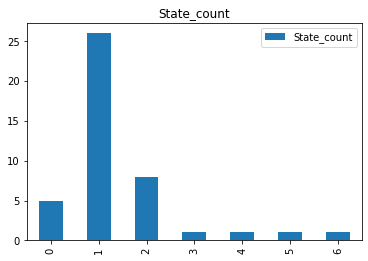

In [18]:
%matplotlib inline
buckets.plot(kind='bar',subplots=True)


## Calling Plotly API


In [20]:

import chart_studio.plotly as py
import plotly.graph_objs as go

ModuleNotFoundError: No module named 'chart_studio'